# Stochastic processes with R
## César Vargas, Ph.D.

# Outline
- Deterministic and stochastic differences (motivations)
- Quick intro to R
- Simulating random variables
- Poisson process
- Continuous time Markov chain
- SSA Gillespie exact simulator
- Stochastic hybrid systems
    - Production reaction
    - Degradation reaction
    - Reversible reaction
    - Bimolecular reaction
    - Central dogma
    - Feedback
    - Logistic growth
    - Moment dynamics
    - Moment closure
    - Molecule reacting systems
    - Cell growth and division
- Packages and simulators
    - R packages
    - Julia packages

In [7]:
# Libraries to be load
%load_ext rpy2.ipython

# One-day quick intro to R

## R as a simple calculator

In [2]:
%%R
1+1

[1] 2


Compared with python, there is not much difference

In [3]:
1+1

2

C might be a litte bit tricky

In [8]:
import cffi_magic

In [10]:
%%cffi int add_num();
int add_num()
{
    int a=1;
    int b=1;
    
    return a+b;
}

add_num()

2

In [3]:
from julia import Main

FileNotFoundError: [Errno 2] No such file or directory: 'julia': 'julia'

### Try your self: 
- $3\times3$, $4 / 4$.
- How many ordering are there of a standard 52-card deck?
- An isosceles right triangle has two legs of lenght 5. Find the hypotenuse lenght.
- The hyperbolic sine is the function 
$$h(x)=\frac{e^x-e^{-x}}{2} $$
Evaluate at $x=1$. Check with R function `sinh(1)`.

## Vectors in R

Defining vectors in R is as simple as:

In [8]:
%%R
1:10

 [1]  1  2  3  4  5  6  7  8  9 10


In [10]:
%%R
-3:5

[1] -3 -2 -1  0  1  2  3  4  5


Alternatives for vector creation are:

In [11]:
%%R
seq(1,10)

 [1]  1  2  3  4  5  6  7  8  9 10


In [12]:
%%R
seq(1,10,2)

[1] 1 3 5 7 9


In [13]:
%%R
seq(20,1,-4)

[1] 20 16 12  8  4


In [15]:
%%R
c(2,3,5,7,11)

[1]  2  3  5  7 11


Saving vectors into a variable is nothing but

In [18]:
%%R
primes <- c(2,3,5,7,11)
primes

[1]  2  3  5  7 11


In [19]:
%%R
primes <- c(primes,2,3,5,7,11)
primes

 [1]  2  3  5  7 11  2  3  5  7 11


We could pick any element in the vector through squared brackets

In [21]:
%%R
primes[4]

[1] 7


In [22]:
%%R
primes[1:4]

[1] 2 3 5 7


In [23]:
%%R
primes[c(1,4,5,10)]

[1]  2  7 11 11


We could look for elements matching a given criteria within the vector

In [24]:
%%R
primes

 [1]  2  3  5  7 11  2  3  5  7 11


In [26]:
%%R
which(primes < 10)

[1] 1 2 3 4 6 7 8 9


In [28]:
%%R
index <- which(primes < 10)

In [30]:
%%R
primes[index]

[1] 2 3 5 7 2 3 5 7


Vectors can consist of almost anything

In [35]:
%%R
y <- c("Probability", "is", "very", "very","cool")
y

[1] "Probability" "is"          "very"        "very"        "cool"       


In [36]:
%%R
y[c(1,2,5)]

[1] "Probability" "is"          "cool"       


When performing mathematical operations, a vector is treated as a single element

In [37]:
%%R
dog <- seq(0,30,4)

In [38]:
%%R
dog

[1]  0  4  8 12 16 20 24 28


In [39]:
%%R
dog+1

[1]  1  5  9 13 17 21 25 29


In [40]:
%%R
dog*3

[1]  0 12 24 36 48 60 72 84


In [41]:
%%R
1/dog

[1]        Inf 0.25000000 0.12500000 0.08333333 0.06250000 0.05000000 0.04166667
[8] 0.03571429


In [42]:
%%R
cat <- dog+1
cat

[1]  1  5  9 13 17 21 25 29


In [43]:
%%R
dog*cat

[1]   0  20  72 156 272 420 600 812


Functions naturally take vectors as arguments

In [45]:
%%R
factorial(1:7)

[1]    1    2    6   24  120  720 5040


In [46]:
%%R
sqrt(seq(0,900,100))

 [1]  0.00000 10.00000 14.14214 17.32051 20.00000 22.36068 24.49490 26.45751
 [9] 28.28427 30.00000


Some useful functions when using vectors

In [49]:
%%R
x <- c(67.6, 68.7, 66.3, 66.2, 65.5, 70.2, 71.1)
sum(x)

[1] 475.6


In [50]:
%%R
mean(x)

[1] 67.94286


In [51]:
%%R
length(x)

[1] 7


In [52]:
%%R
sort(x)

[1] 65.5 66.2 66.3 67.6 68.7 70.2 71.1


In [53]:
%%R
sort(x,decreasing=T)

[1] 71.1 70.2 68.7 67.6 66.3 66.2 65.5


### Pop problems

- Compute the squares of the first ten integers
- Powers of $2$ from $2^1$ to $2^{20}$
- Cube of the 100 first integers

## Generating random variables

In [54]:
%%R
sample(1:10,1)

[1] 2


In [55]:
%%R
sample(1:4,4)

[1] 2 4 3 1


In [56]:
%%R
sample(c(-8,0,1,4,60),6,replace=T)

[1] 60  1  0 -8  1 -8


In [57]:
%%R
sample(1:6,10,replace=T)

 [1] 6 3 6 2 6 4 2 2 6 4


### Pop problems

- Consider a probability distribution on {0, 2, 5, 9} with respective probabilities 0.1, 0.2, 0.3, 0.4. Generate a random sample of size five


## Probability distributions

In [58]:
%%R
runif(6,0,1)

[1] 0.25663353 0.43869646 0.20287613 0.88154234 0.56350177 0.05643692


In [59]:
%%R
rnorm(9,69,2.5)

[1] 68.24738 65.15984 67.44907 70.72245 69.89585 69.89349 67.60311 72.34517
[9] 67.90156


In [60]:
%%R
pexp(2.5,1)

[1] 0.917915


In [61]:
%%R
qnorm(0.95,500,100)

[1] 664.4854


In [62]:
%%R
dbinom(10,20,0.5)

[1] 0.1761971


## Plotting

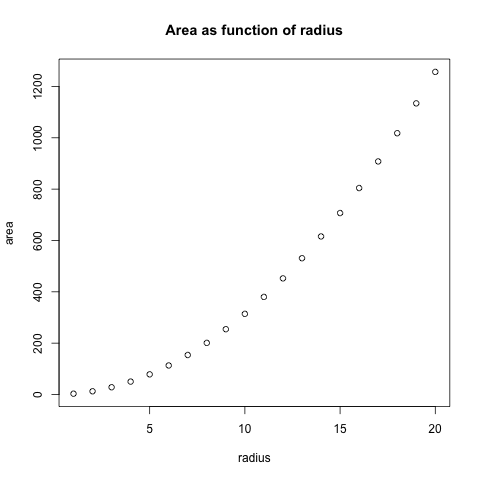

In [64]:
%%R
radius <- 1:20
area <- pi*radius^2
plot(radius,area, main="Area as function of radius")

In [76]:
%%R
heights <- rnorm(1000,69,2.0)

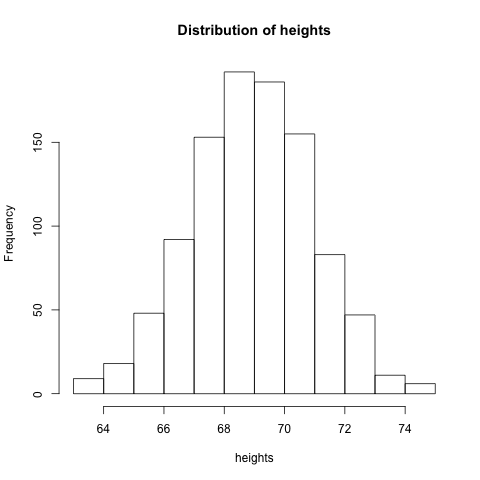

In [69]:
%%R
hist(heights,main="Distribution of heights")

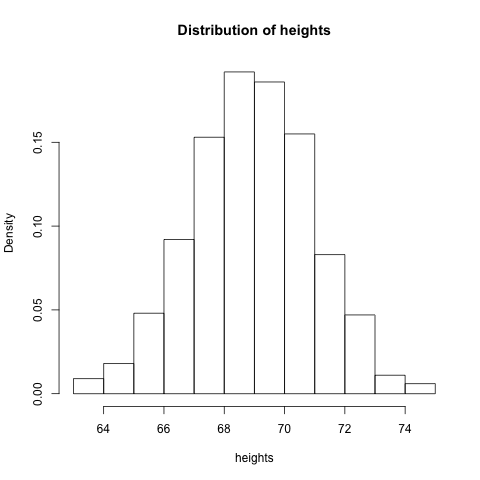

In [70]:
%%R
hist(heights,main="Distribution of heights",freq=F)

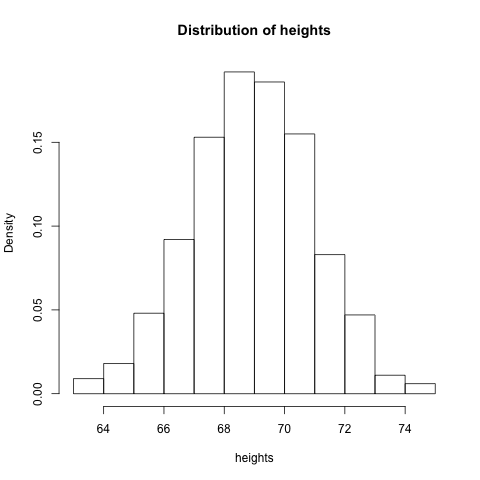

In [74]:
%%R
hist(heights,main="Distribution of heights",freq=F)

In [77]:
%%R
curve(dnorm(x,69,2),60,80,add=T)


Error in plot.xy(xy.coords(x, y), type = type, ...) : 
  plot.new has not been called yet


# Simulating random variables

How to simulate a discrete random variable, for instance the outcomes of tossing a coin?
if $U(0,1)$ is a uniform random variable between 0 and 1, the a Bernoulli r.v. can be written as 
$$X=\begin{cases}
1 & U<p\\
0 & U\geq p
\end{cases}$$